In [1]:
import numpy as np
import pandas as pd
from math import log
import chess
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def get_result(white_result):
    if white_result == 'win':
        return 1
    elif white_result == 'drew':
        return 0
    else:
        return -1

def piece_imbalance(fen):
    board = chess.Board(fen)
    piece_counts = {
        'P': len(board.pieces(chess.PAWN, chess.WHITE)),
        'N': len(board.pieces(chess.KNIGHT, chess.WHITE)),
        'B': len(board.pieces(chess.BISHOP, chess.WHITE)),
        'R': len(board.pieces(chess.ROOK, chess.WHITE)),
        'Q': len(board.pieces(chess.QUEEN, chess.WHITE)),
        'p': len(board.pieces(chess.PAWN, chess.BLACK)),
        'n': len(board.pieces(chess.KNIGHT, chess.BLACK)),
        'b': len(board.pieces(chess.BISHOP, chess.BLACK)),
        'r': len(board.pieces(chess.ROOK, chess.BLACK)),
        'q': len(board.pieces(chess.QUEEN, chess.BLACK))
    }

    imbalance = {
        'Pawns': piece_counts['P'] - piece_counts['p'],
        'Knights': piece_counts['N'] - piece_counts['n'],
        'Bishops': piece_counts['B'] - piece_counts['b'],
        'Rooks': piece_counts['R'] - piece_counts['r'],
        'Queens': piece_counts['Q'] - piece_counts['q']
    }

    return imbalance

In [7]:
symbols = ['♙', '♘', '♗', '♖', '♕']

In [3]:
df = pd.read_csv('data/chess.csv')
df['result'] = df['white_result'].apply(get_result)
df.head()

,white_username,black_username,white_id,black_id,white_rating,black_rating,white_result,black_result,time_class,time_control,rules,rated,fen,pgn,result
0,-Amos-,miniman2804,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/miniman2804,1708,1608,win,checkmated,daily,1/259200,chess,True,r2r4/p2p1p1p/b6R/n1p1kp2/2P2P2/3BP3/PP5P/4K2R ...,"[Event ""Enjoyable games 2 - Round 1""]\n[Site ""...",1
1,-Amos-,koltcho69,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/koltcho69,1726,1577,win,resigned,daily,1/172800,chess,True,8/5Q1k/4n1pp/8/7P/2N2b2/PP3P2/5K2 b - - 1 33,"[Event ""Rapid Rats - Board 5""]\n[Site ""Chess.c...",1
2,-Amos-,enhmandah,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/enhmandah,1727,842,win,resigned,daily,1/172800,chess,True,rn1q1b1r/kb2p1pp/2p5/p1Q5/N1BP2n1/4PN2/1P3PPP/...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",1
3,enhmandah,-Amos-,https://api.chess.com/pub/player/enhmandah,https://api.chess.com/pub/player/-amos-,819,1727,checkmated,win,daily,1/172800,chess,True,r3kb1r/pp3ppp/3p1n2/2pKp3/P3P3/1P6/4qP1P/QNB5 ...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",-1
4,-Amos-,Shalllow-Blue,https://api.chess.com/pub/player/-amos-,https://api.chess.com/pub/player/shalllow-blue,1729,1116,win,resigned,daily,1/172800,chess,True,r3b2r/pp6/2pPpR1k/4n3/2P3Q1/3B4/PP4PP/R5K1 b -...,"[Event ""CHESS BOARD CLASH - Round 1""]\n[Site ""...",1


In [4]:
xs, ys = [], []
for i, row in df.iterrows():
    imbalance = list(piece_imbalance(row['fen']).values())
    result = row['result']
    
    xs.append(imbalance)
    ys.append(result)

In [61]:
model = LogisticRegression(solver='lbfgs', multi_class='auto')
model.fit(xs, ys)
cs = model.coef_[0] + model.intercept_
print(cs)
values = cs / cs[0]
print(values)

[0.2429952  0.55576156 0.5922617  0.89166011 1.77038479]
[1.         2.28712977 2.43733907 3.66945559 7.28567794]


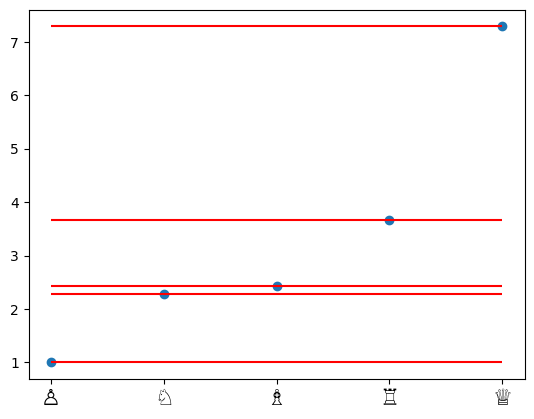

In [62]:
fix, ax = plt.subplots()
ax.scatter(symbols, values)
plt.xticks(fontsize=16)
ax.hlines(values, xmin=0, xmax=4, colors='red')